### BASIC FOLLOWTHROUGH PATTERN FOR A DATASCIENCE PROJECT

This outline is a typical basic workflow pattern for any Machine Learning/Data Science Project

    1. Look at the Big Picture
    2. Get the Data
    3. Discover and Visualize the data to gain Insights
    4. Prepare the data for Machine Learing Algorithms
    5. Select a model and train it
    6. Fine-tune your model
    7. Present your Solution
    8. Launch, Monitor, Maintain your System.

In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#1. BIG PICTURE:
#   Given California housing census data, build a MODEL of housing "prices"[--target] in california
#   END GOAL: Your model is part of a pipeline for Investment ananalysis who could use your model to set house prices

In [ ]:
#2. GET THE DATA


DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml/raw/master/datasets"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + "/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """
    Function download data from the Url, create a folder in the directory workspace
    extract the file type and close the whole process
    
    =========================
    
    line 1 - if statement checks if the directory is in workspace and if not create it
    line 2 & 3 - create a path for the incoming file and retrieve data from the url to the path specified
    others Open, extract and close the function
    
    ========================
    OBSERVATION: Keep it Extremely Simple KIES
    2. There was a problem with the url, normally github folder can be viewed with 'raw' in the url replaced with 'tree'
        But viewing the url directly with raw returns an error
        Answer from stackoverflow: When you view a file it has a link to the "raw" version, through this you will be able to
        download the file -- 'format -- github.com/user/repository/raw/branch/filename –' then you will be able to use
        'urllib' module to extract the file
    
    """
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

In [5]:
FILENAME = 'housing.csv'
def load_housing_data(housing_path=HOUSING_PATH, csv_filename=FILENAME):
    """
    Function to load csv file given a housing, path
    """
    csv_path = os.path.join(housing_path, csv_filename)
    return pd.read_csv(csv_path)


housing = load_housing_data()

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### FAST AND QUICK METHODOLOGY TO START OUT WITH DATA
1. Check info() of data, observes if there is null value
2. Check object values for value_count() to see if there are unneccessary values
3. check for data distribution with describe

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# value_counts() is very useful for object column considering that even when your file establishes that there isn't any null
# value in such column, they may contain not letter entery or irrational entries.
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
# describe() is a good way to understand the distribution of your data 
# MY Observation: I am suspicious of the fact that we have columns with very high std
housing.describe()

C:\Users\ADEKUNLE\Anaconda3_2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,NaN,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,NaN,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,NaN,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


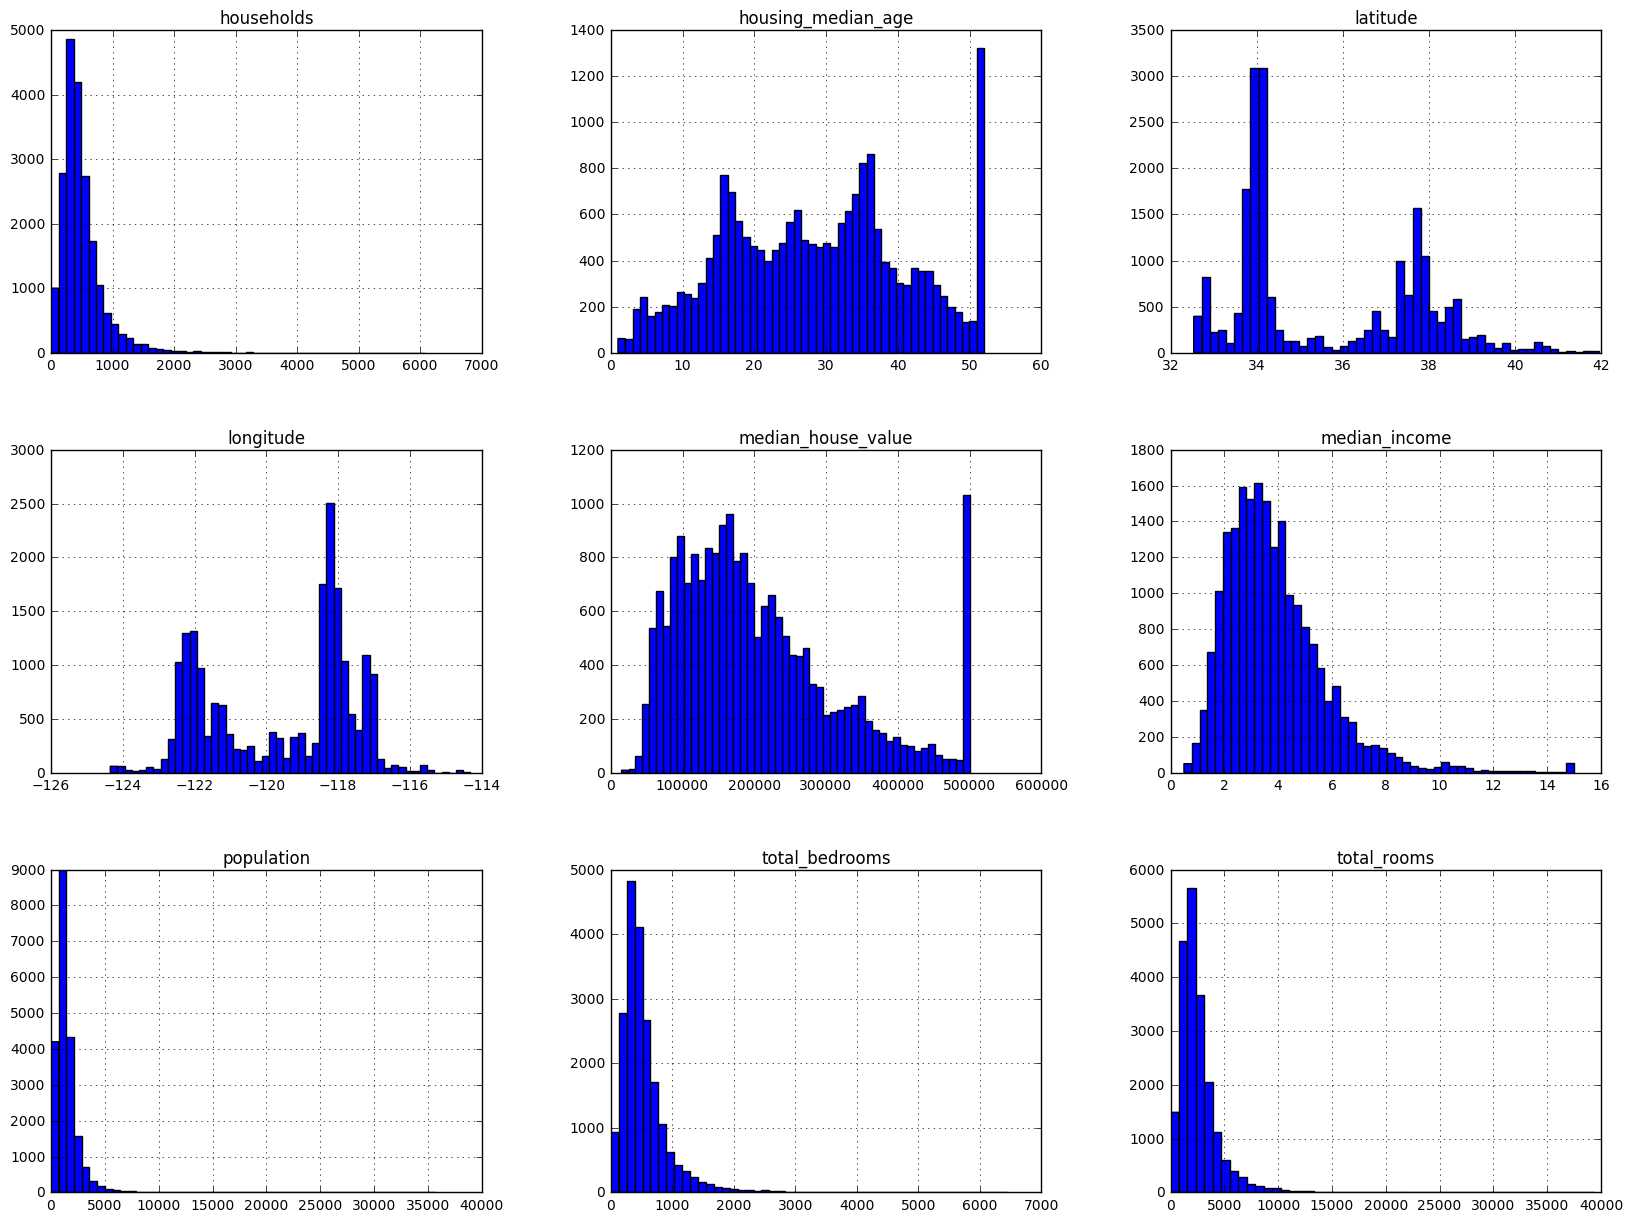

In [10]:
# Another quick and data feel on the data with histogram
# This kind of histogram clearly shows the distribution of each numberical variable
housing.hist(bins=50, figsize=(20, 15))  #call plt.show() to surpress verbose on matplotlib object
plt.show()

In [11]:
#Create Test Set
#METHOD 1
import numpy as np

def split_train_test(data, test_ratio):
    """
    Using np.random.permutation -- we shuffle the indices of the data, then create a test size size based on the test ratio
    
    ======
    
    Then the test size is being use to index the shuffled indices
    NB: This gives different train, test on every run cos of the shuffled indeces 
    """
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.3)

train_set.size, test_set.size

(144480, 61920)

In [12]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_test_train_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    """
    Function uses an id column mixed with hashlib to create a consistent a train test split
    
    =======
    Note: You can deliberately create a column to become id column e.g Long and latitude of data
    
    housing["id"] = housing["Logitude"] * 1000 + housing["Latitude"]
    """
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()
train_set, test_set = split_test_train_by_id(housing_with_id, 0.2, "index")

print(housing_with_id.head(), (train_set.size, test_set.size))

   index  longitude  latitude  housing_median_age  total_rooms  \
0      0    -122.23     37.88                41.0        880.0   
1      1    -122.22     37.86                21.0       7099.0   
2      2    -122.24     37.85                52.0       1467.0   
3      3    -122.25     37.85                52.0       1274.0   
4      4    -122.25     37.85                52.0       1627.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0       322.0       126.0         8.3252            452600.0   
1          1106.0      2401.0      1138.0         8.3014            358500.0   
2           190.0       496.0       177.0         7.2574            352100.0   
3           235.0       558.0       219.0         5.6431            341300.0   
4           280.0       565.0       259.0         3.8462            342200.0   

  ocean_proximity  
0        NEAR BAY  
1        NEAR BAY  
2        NEAR BAY  
3        NEAR BAY  
4        NEAR BAY   (1

In [13]:
#Using scikit learn
#using sklearn you get the random state off the shelf -- no matter how much you run the code you get same index
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set.index

Int64Index([14196,  8267, 17445, 14265,  2271, 17848,  6252,  9389,  6113,
             6061,
            ...
            11363, 14423,  4426, 16850,  6265, 11284, 11964,  5390,   860,
            15795],
           dtype='int64', length=16512)

### Stratified Sampling
Using Stratified Sampling: This is simply a method of picking a representative of the population
E.g in US M=51,3%, F=48.7% so to pick 1000 people from the population with same percentage "Stratified Sampling" comes in.

Example: From the housing Dataset, assuming an expert told you that median income is a very important feature in the data for for predicting house price according to trends, you may want to ensure that **the dataset split is a representative of the median income**. I am thinking this may also be useful, after an ML workflow and you have determined feature importance especially in regression cases, you may want to make your train test split to be a representative of the feature.

In [14]:
# To normalize a little
# When using pd.series.where, it evaluates a condition, keeps the true part on the df/series and make a replacement given as 
# condigion
#======np.where(<check_if_is_true>, <something_to_replace_all_false_value>)==============
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
#====Use the print value to compare before and after==========
print(housing[['income_cat', 'median_income']].head())
housing.income_cat.where(housing["income_cat"] < 5, 5.0, inplace=True)

print(housing[['income_cat', 'median_income']].head())

   income_cat  median_income
0         6.0         8.3252
1         6.0         8.3014
2         5.0         7.2574
3         4.0         5.6431
4         3.0         3.8462
   income_cat  median_income
0         5.0         8.3252
1         5.0         8.3014
2         5.0         7.2574
3         4.0         5.6431
4         3.0         3.8462


In [15]:
#Stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit
#n_split is the number of reshuffling, Stratification is done based on a target in this case housing['income_cat]
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#remove income_cat to return data back to original
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

###              Idea of Building a preliminary visualization to visualize your project

                            Key things to watch
   1. What is the correlation that exists between **Numerical Variables**
   2. How does your categorical variables relate with the predictors
   3. If you create new features will they have better correlations
   4. Create a visualization across the interelationship of 3 to 4 variables
        
**Note: The process is Iterative -- When you get a working prototype it's expedient that you come back to this process and keep getting things that could help your prediction**

In [17]:
#Make test copy so that we get something to fall back to 
housing = strat_train_set.copy()

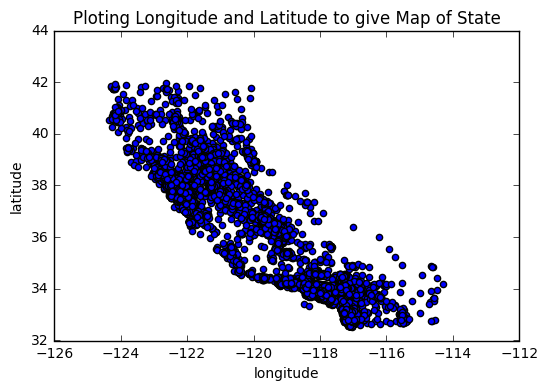

In [25]:
#Simple plot with plot(kind, x, y)
housing.plot(kind="scatter", x="longitude", y="latitude", title="Ploting Longitude and Latitude to give Map of State")

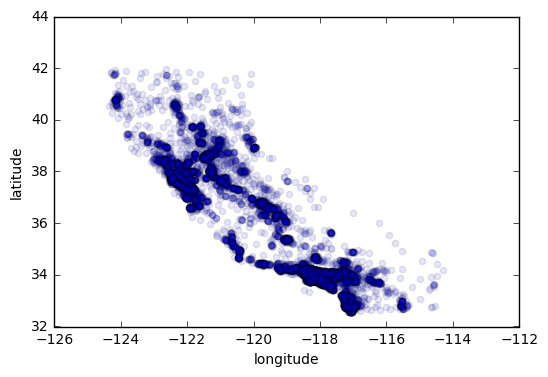

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
#Best practise may be to create the plots side of each other

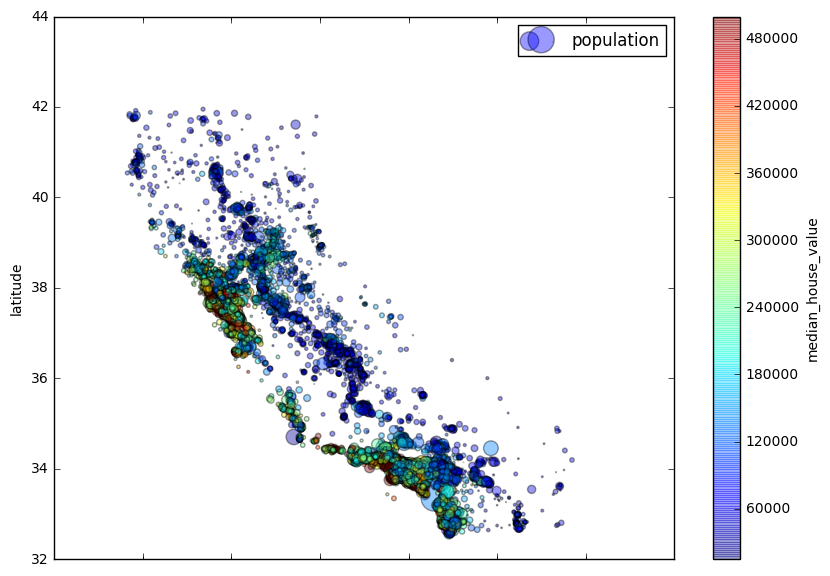

In [47]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing['population']/100, label="population", 
             c="median_house_value", cmap=plt.get_cmap("jet"),
             colorbar=True, figsize=(10,7))
plt.legend()
plt.show()


#TODO: Try to name where LosAngeles and SanFransico are

In [53]:
#The correlation of numerical values
corr_matrix = housing.corr()
#Since median_house_value is the predictor, you can try to check correlation of other variables with median house value
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

QUESTION:WHAT IS THE EFFECT OF CORRELATED VARIABLE IN RANDOM FOREST CLASSIFIER

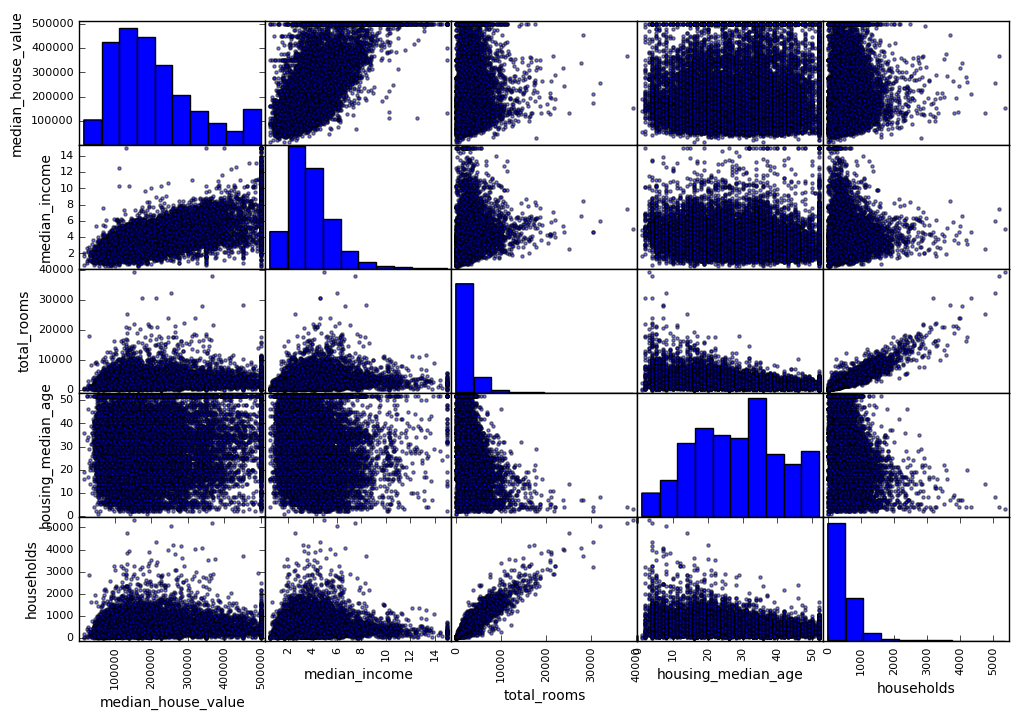

In [65]:
from pandas.tools.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "households"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

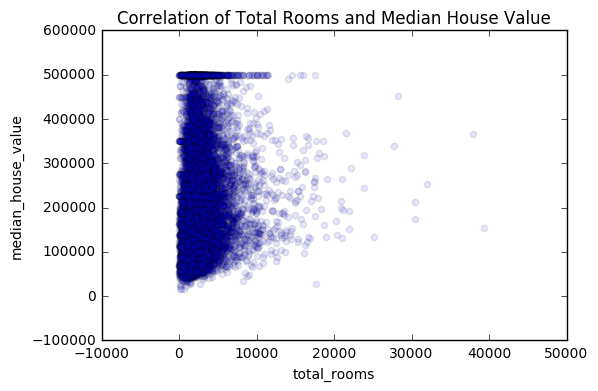

In [59]:
housing.plot(kind="scatter", x="total_rooms", y="median_house_value", alpha=0.1, 
             title="Correlation of Total Rooms and Median House Value")

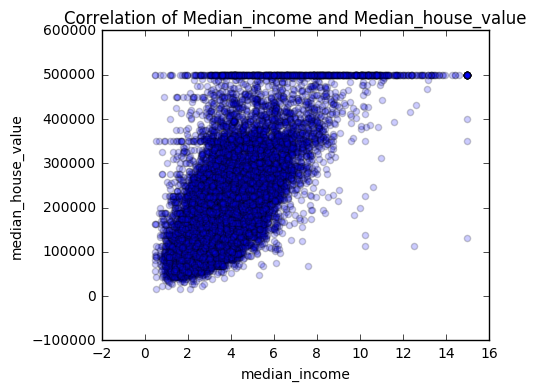

In [64]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", figsize=(5, 4),
            title= "Correlation of Median_income and Median_house_value",
            alpha=0.2)

In [66]:
#Experimenting with attribute combination
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [67]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [68]:
corr_matrix_new = housing.corr()
corr_matrix_new["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Prepare the Data
   * **Deal with Numerical Variables**
     * Deal with missing values either by removing the rows with missing values(this may not be feasible when you have multiple feature with varying rows of missing values) or removing the entire column or input values into the missing regions
   * ** Deal with Categorical Variable**
     * Work on missing values
     * Encode the variables
     
**Note: My suggestion is to divide the numeric and categorical data seperately after which you will now come back to join both dataframes before prediction**

In [69]:
#Drop your y from the dataset, y being your target variable
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

In [70]:
#total_bedrooms contain missing values and we will fill it in with median
median = housing.total_bedrooms.median()
housing["total_bedrooms"].fillna(median)

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
19480     588.0
8879      317.0
13685     293.0
4937      465.0
4861      229.0
16365     951.0
19684     559.0
19234     501.0
13956     582.0
2390      495.0
11176     649.0
15614     545.0
2953      251.0
13209     409.0
6569      261.0
5825      913.0
18086     538.0
16718     945.0
13600     278.0
13989     444.0
15168     190.0
6747      563.0
7398      366.0
5562      133.0
16121     416.0
          ...  
12380     767.0
5618       24.0
10060     539.0
18067     438.0
4471      797.0
19786     300.0
9969      393.0
14621    1051.0
579       302.0
11682    1615.0
245       460.0
12130     537.0
16441     544.0
11016     428.0
19934     422.0
1364       34.0
1236      829.0
5364      272.0
11703     300.0
10356     449.0
15270     515.0
3754      373.0
12166     756.0
6003      932.0
7364      212.0
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, dt

You can use sklearn _imputer()_ over all the numerical aspect of the dataset
How to Use Imputer:
  * import Imputer() from sklearn.preprocessing
  * Drop any categorical variable cos Imputer works only with numerical variables
  * Then initialize Imputer as: <pre> ```imputer = Imputer(strategy=median)``` </pre> and fit on your data
  * Then use imputer to tranform your data or better still bypass 3 point by using <pre> ```imputer.fit_transform()``` </pre>
  * Then you can convert the numpy result back to DataFrame

In [72]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [73]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [74]:
#Using Onehotencoder() because labelencoder may see the classes as ordinal
from sklearn.preprocessing import OneHotEncoder
encoder_OH = OneHotEncoder()
housing_cat_1H = encoder_OH.fit_transform(housing_cat_encoded.reshape(-1, 1)) 
housing_cat_1H
#Output is good as sparse matrix from scipy to help free up memory

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [75]:
housing_cat_1H.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [77]:
#Cominbining LabelEncoder and OneHotEncoder to form LabelBinarizer
from sklearn.preprocessing import LabelBinarizer
binarizer = LabelBinarizer() #To get a sparse Matrix use sparsematrix = True
house_cat_1H = binarizer.fit_transform(housing_cat)
house_cat_1H

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [78]:
# With binarizer.classes, you can construct a dataframe for your house_cat_1H using pd.Dataframe but you have to pay attention to
#index
binarizer.classes_

encode_df = pd.DataFrame(house_cat_1H, columns=list(binarizer.classes_))

encode_df.head()

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], 
      dtype='<U10')

In [81]:
#Custom Transformer, on which you can only declare fit and transform
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_addder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_addder.transform(housing.values)
#Then convert to DataFrame with new columns added to the initial column

## Pipelining Your Workflow

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

housing_num = housing.drop("ocean_proximity", axis=1)

#We will be pipelining the transformation done on numerical variables
num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler())
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [86]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [94]:
from sklearn.pipeline import FeatureUnion

#Define a custom DataFrameSelector from the BaseEstimator class that helps select the columns for each pipeline process
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_attribs = list(housing_num) #Returns the list of columns of the DataFrame
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler())
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', LabelBinarizer())
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ('num_pipeline', num_pipeline),
        ('cat_pipeline', cat_pipeline)
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [96]:
housing_prepared.shape

(16512, 16)

## Training and Evaluation on Data
Having cleaned up your data, you can then Train and Evaluate your model
1. Test Multiple model on Training Data using Cross_validation and scoring
2. Fine Tune your Model using GridSearchCv

In [97]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
# Now on the same data let's do some prediction and view the the comparism with our model's prediction
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

In [100]:
# Let's check error on the prediction
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.198198489219

In [101]:
#Using DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [102]:
#Let's evaluate this on our training data
#come and see how decision tree is a thief!!!!
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:\t", tree_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 286600.  340600.  196900.   46300.  254500.]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [103]:
#More professionally, observing the error on prediction

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [104]:
#Using cross_validation to avoid overfitting such as seen with DecisionTree
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [105]:
rmse_scores

array([ 68323.46677136,  65136.75116138,  71862.19147154,  69127.49393668,
        70663.47580184,  75702.36784326,  70875.13771423,  71999.91006905,
        76170.17057592,  69629.2530678 ])

In [107]:
#custom function to cumpute some various attributes from the scores
def display_scores(scores):
    print("Scores:", scores)
    print("Score_mean", scores.mean())
    print("Score_std", scores.std())
    
display_scores(rmse_scores)

Scores: [ 68323.46677136  65136.75116138  71862.19147154  69127.49393668
  70663.47580184  75702.36784326  70875.13771423  71999.91006905
  76170.17057592  69629.2530678 ]
Score_mean 70949.0218413
Score_std 3124.35138827


In [109]:
#Decision Tree is bad on data as seen above, trying Cross_val with linreg

scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores: [ 66782.73843989  66960.118071    70347.95244419  74739.57052552
  68031.13388938  71193.84183426  64969.63056405  68281.61137997
  71552.91566558  67665.10082067]
Score_mean 69052.4613635
Score_std 2731.6740018


In [114]:
#Let's try the RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_prediction = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, forest_prediction)
print("forest_rmse:", np.sqrt(forest_mse))

scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

forest_rmse: 22132.9839143
Scores: [ 51749.31130867  50296.06356746  51984.20682294  56168.82961804
  51720.68294465  55221.18043665  51138.27437908  51343.51271663
  55595.65949045  53826.3936851 ]
Score_mean 52904.411497
Score_std 2001.45151134


In [117]:
#To save this model Use joblib other usable package is pickle
from sklearn.externals import joblib

joblib.dump(forest_reg, "forest_Regression_bare.pkl")
#You can load with forest_reg_load = jumbblib.load("forest_Regression_bare.pkl")

['forest_Regression_bare.pkl']

In [120]:
#A very good way to check the parameters to fit on
forest_reg.get_params().keys()

dict_keys(['n_estimators', 'verbose', 'warm_start', 'oob_score', 'max_features', 'max_depth', 'criterion', 'max_leaf_nodes', 'n_jobs', 'min_weight_fraction_leaf', 'bootstrap', 'min_samples_leaf', 'min_impurity_split', 'random_state', 'min_samples_split'])

In [121]:
#Fine Tune Your Model
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [125]:
print(grid_search.best_params_, grid_search.best_score_)

mse_best = np.sqrt(-grid_search.best_score_)
print(mse_best)

({'max_features': 6, 'n_estimators': 30}, -2516678558.1445322)

In [128]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [131]:
# with this you can print out the result of the grid_search and best esitmator  using grid_search.cv_results_.keys()
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres['params']):
    print(np.sqrt(-mean_score), params)

65538.944257 {'n_estimators': 3, 'max_features': 2}
55672.3152713 {'n_estimators': 10, 'max_features': 2}
52759.9239767 {'n_estimators': 30, 'max_features': 2}
60368.6094164 {'n_estimators': 3, 'max_features': 4}
52585.0787657 {'n_estimators': 10, 'max_features': 4}
50556.5317499 {'n_estimators': 30, 'max_features': 4}
57978.9778031 {'n_estimators': 3, 'max_features': 6}
51989.8419105 {'n_estimators': 10, 'max_features': 6}
50166.5083312 {'n_estimators': 30, 'max_features': 6}
58820.7484625 {'n_estimators': 3, 'max_features': 8}
51874.3917904 {'n_estimators': 10, 'max_features': 8}
50383.9310252 {'n_estimators': 30, 'max_features': 8}
63008.8902455 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54587.2367692 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59830.510606 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52742.2075971 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58440.2330976 {'bootstrap': False, 'max_features': 4, 'n_estimat

## Now analyze feature importance so that it will help in reengineering features for better model


In [132]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([  7.57499693e-02,   6.71591947e-02,   4.46267897e-02,
         1.70583891e-02,   1.74379130e-02,   1.71862380e-02,
         1.62689526e-02,   3.42609965e-01,   5.76349053e-02,
         1.06579567e-01,   7.19265310e-02,   1.33534840e-02,
         1.45946559e-01,   1.04868072e-04,   2.18203075e-03,
         4.17464375e-03])

In [135]:
#Remember this doesn't have their column name, so how to get column name to know which feature is actually doing what
extra_attributes = ['rooms_per_household', 'pop_per_hhold', 'bedrooms_per_room']
cat_one_hot_attrib = list(encoder.classes_) #binarizer.classes_
attributes = num_attribs + extra_attributes + cat_one_hot_attrib
sorted(zip(feature_importance, attributes), reverse=True)

[(0.34260996505625785, 'median_income'),
 (0.14594655875294554, 'INLAND'),
 (0.10657956698140522, 'pop_per_hhold'),
 (0.075749969306011841, 'longitude'),
 (0.071926531012031475, 'bedrooms_per_room'),
 (0.067159194743184436, 'latitude'),
 (0.057634905300255973, 'rooms_per_household'),
 (0.04462678967348175, 'housing_median_age'),
 (0.017437913003762403, 'total_bedrooms'),
 (0.017186237950194881, 'population'),
 (0.017058389119105719, 'total_rooms'),
 (0.016268952559947009, 'households'),
 (0.013353483966075658, '<1H OCEAN'),
 (0.0041746437500307732, 'NEAR OCEAN'),
 (0.0021820307535746365, 'NEAR BAY'),
 (0.00010486807173485613, 'ISLAND')]

In [136]:
#Using your model on test dataset
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

In [140]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

47999.6515592


In [141]:
#Save your final model
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']